# Networks and Human Behavior
## Tools for computational analysis

### TABLE OF CONTENTS 


1. [Introduction](#What-you-need!)
    

2. [Network Representation](#first)
    
    2.1 [Nodes and Edges](#NE)
    
    2.2 [Graphs](#G)
    
    2.3 [Adjacency Matrix](#A)
        
        
        
3. [Managing Network Data](#Data)

Note: this index and its links don't render properly on github but will work if you open it using jupyter.

***
<a id="What-you-need!"></a>
### Introduction

The empirical work in this course will be organized in a series of Jupyter Notebooks of which this is the first one.

- The notebooks will provide you with enough information to understand the concepts of the class and the tools to perform your own exploratory analysis. 

- They are not exhaustive, meaning that there may be alternative methods to do the same tasks.

- They are work in progress, so kindly flag any issues you encounter or any suggestions for improvement.

<br>
<div class="alert alert-block alert-success"> 
You can vizualize the notebooks on your browser but you will get the most out of the material if you download and run them in Python as you go along.
    <br>
    <br>
If you have not done so yet, follow the setup instructions.
</div>

***
<a id="first"></a>
### Network Representation

<a id="NE"></a>
#### Nodes and Edges
Networks provide us with a mental model to describe and study interactions of individual entities within a community or group.

The basic elements of the network are thus:

-  <u>The individuals</u>: e.g. humans, countries, banks. Abstractly referred to as **nodes** (N).
-  <u>The relationships</u>: e.g. friendships, trade treaties, loans. Generically called **edges** (E).

A simple network is thus defined as a set of nodes (think for instance the group of students taking this class) and a description of whether each pair of nodes interacts with each other; we will sometimes talk about this interacting status as the pair being **connected**.

> Naturally, information regarding the same network (that is the same sets of nodes and edges) can be conveyed and stored in different forms.
>
> This is important to remember because it could determine how you handle network data; for instance it could influence which function you use to load a network into a notebook. 
    
To fix some ideas let's consider a group of 5 people: Thomas, Carl, Sara, Mark and Sonia.

<br>
<div class="alert alert-block alert-info"> One of Python's convenient features is that it allows you to build programs based on objects. We will not enter in more detail for the purpose of this class but you will find "pre-programmed" objects such as <b>sets</b> and <b>lists</b> to be very useful.</div>
    
Let's define a set of our group of students:    

In [1]:
students = {'Thomas', 'Carl', 'Sara', 'Mark','Sonia'}

In [2]:
# We can see the elements of the set of students by using the generic print() function from python
print(students)

{'Sara', 'Thomas', 'Carl', 'Sonia', 'Mark'}


In [3]:
# It's fairly simple to add another name,
# If you have downloaded this notebook and are runnning it as you read, feel free to change YOU for your own name
students.add("YOU")

# Note: there are many other things that can be done with sets. You can search online if you are curious.

print(students)

{'Sara', 'Thomas', 'Carl', 'YOU', 'Sonia', 'Mark'}


Now, let us fully characterize the network of **friendships** in the class by listing all the pairs of friends:

In [4]:
friend_list = [('Sara','Sonia'),
               ('Sara','Mark'),
               ('Sonia','Mark'),
               ('Sonia','Carl'),
               ('Sonia','Thomas'),
               ('Mark','Thomas')
              ]

Remark in a few details. 

- In this simple network we consider that Sara being friends with Sonia implies that Sonia is friends with Sara. Such networks are known as **undirected** and thus we only need to list the edge between Sara and Sonia once and the ortehr of the elements of the pair is irrelevant.
- The converse type of networks are known as **directed** (simplest example would be Twitter) in which the relationship can be one-sided and thus `('Sara','Sonia')` would be represent a different edge from  `('Sonia','Sara')` and both would have to be specified if both indeed appear in the directed network.
- In this classroom network not everyone is connected to everyone else and in particular you as the new student have not yet had the chance to make any connections. This shows why both sets (N and E) are important to fully describe the network. Nodes with no edges (also known as **isolated** nodes) do not appear anywhere on the edgelist.
- Nodes do not have edges with themselves. This is a simple convention that can sometimes be consequential and can be changed in specific contexts.

`students` and `friend_list` fully describe our simple network.

We know all the members of the community and who is friends with whom.

<a id="G"></a>
#### Graphs
Nodes and edges are naturally ameanable to be represented by a graph in which nodes are vertex or points and edges between them show the connections (you can get an idea of where some of the names come from).

Graphs are nice because they provide insightful visualizations but also because many mathematicians and theorists have spent time and effort studying and finding many useful properties some of which we shall cover in this course.

<br>
<div class="alert alert-block alert-info"> Not all objects and functions that we will use on Python are already loaded when you launch the interpreter (or open a notebook). There is a vast number of modules (or packages) that expand your ability to perform computations without having to code the functions from scratch. <br>

To use these functions and objects you have to import them. The best practice is to import them at the begining of your code and to use aliases defined by convention. <br>

Modules are imported by running:
<pre><code>import module_name as module_alias</code></pre>


The word  following "as" is known as an alias and it serves as a prefix for when you call the functions of  that package. If you import the package without an alias then you can just type the function names without any prefix but  this is bad practice because some packages may have functions with the same name or you may have coded functions with already used names. <br>
<br> 
In principle, you can choose any alias you want for each package. However, there are some conventions and it is easier if you stick to those.    

</div>

In the subsequent notebooks this shall become clear. For now we will just import one package to work with networks (networkx).

In networkx, networks are usually defined as a graph object. Let's play with our example network.


In [5]:
import networkx as nx

In [22]:
# Define a graph object G
G=nx.Graph()

# Add  nodes
G.add_nodes_from(students)

In [23]:
# Right now, the graph has all the students but no edges
print('# nodes:',G.number_of_nodes())

print(G.nodes())

print('# edges:',G.number_of_edges())


# nodes: 6
['Sara', 'Thomas', 'Carl', 'YOU', 'Sonia', 'Mark']
# edges: 0


In [24]:
# Let's add the edges from the edge-list
G.add_edges_from(friend_list)

print('# edges:',G.number_of_edges())


# edges: 6


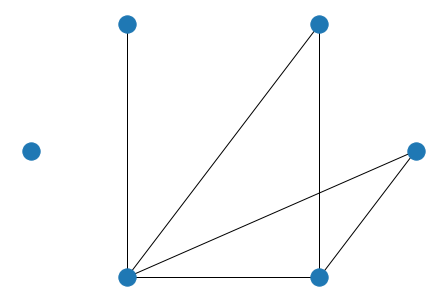

In [25]:
# The next line of code allows to visualize plots within the notebook (in the future we will keep it in the preamble)
%matplotlib inline

# Let's take a look at the network
nx.draw_circular(G)

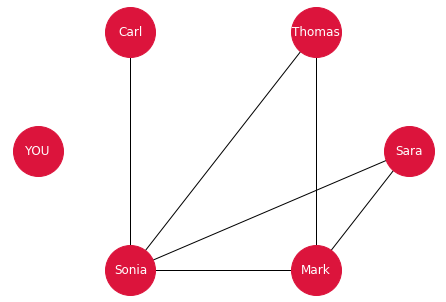

In [26]:
# Don't worry too much about all these extra arguments, it is just to visualize it better.
nx.draw_circular(G, with_labels = True,node_color='crimson',node_size=2500,font_color='white')

Now that you are getting so good at networking, you could probably add some edges with the other students.

In [27]:
G.add_edge('YOU','Sara')
G.add_edge('YOU','Thomas')


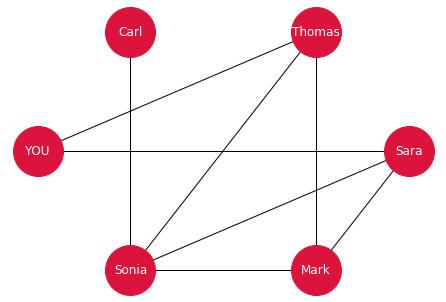

In [28]:
nx.draw_circular(G, with_labels = True,node_color='crimson',node_size=2500,font_color='white')

<a id="A"></a>
#### Adjacency Matrix

Another very useful representation for a network is its **adjacency matrix**. 

To understand this matrix:

1. Choose an order for the nodes.
2. Consider every possible pair of nodes. 

    2.1 If the nodes in the pair are connected, input a 1 in the cell of the matrix whose indices correspond to the pair of nodes.
    
    2.2 If they are not connected, input a zero.
    

For the pre-cooked example in this notebook it should look like this:

| / | Thomas | Mark | Carl | Sonia | Sara | YOU |
| --- | --- | --- | --- | --- | --- | --- |
| Thomas | 0 | 1 | 0 | 1 | 0 | 1 |
| Mark | 1 | 0 | 0 | 1 | 1 | 0 |
| Carl | 0 | 0 | 0 | 1 | 0 | 0 |
| Sonia | 1 | 1 | 1 | 0 | 1 | 0 |
| Sara | 0 | 1 | 0 | 1 | 0 | 1 |
| YOU | 1 | 0 | 0 | 0 | 1 | 0 |


In [13]:
# To get the matrix from your networkx Graph simply use nx.adjacency_matrix()
# Note: you can choose the order in which the nodes are indexed into rows and columns.
# Note 2: Python saves the matrix in a "sparse" format, meaning that it only stores the position of the ones
# and ignores the zeros. So to visualize a matrix like the one above we use the .todense() method 
# on the matrix to "make it dense", that is to generate the zeros.
print(nx.adjacency_matrix(G,nodelist=['Thomas', 'Mark', 'Carl', 'Sonia', 'Sara', 'YOU']).todense())

[[0 1 0 1 0 1]
 [1 0 0 1 1 0]
 [0 0 0 1 0 0]
 [1 1 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 0 0 1 0]]



<br>
<div class="alert alert-block alert-success"> Feel free to <b>play around with the toy network</b> in this notebook. <br>
    <ul>
  <li>Add/delete nodes. E.g. G.add_node('ME'), G.remove_node('YOU'). </li>
  <li>Add/delete edges. E.g. G.add_edge('YOU','Carl'), G.remove_node('Carl','Sonia'). </li>
     </ul>
       
See how this changes affect the edge list, the graph and the adjacency matrix. 
<br>
<br>
<b>Make sure you undertand how the different representations work and relate to one another! </b> <br>
If unsure, review the material, ask your classmates and your instructors :)

</div>

***
<a id="Data"></a>
### Managing Network Data

As you go along with the course material (and in your own future research/work) you will come across network datasets that msy contain many more nodes and edges and you will not be creating the network from scratch as we did here.

The network data may be stored as a list of edges, a graph or an adjacency matrix and all of these could be stored in multiple formats (like .csv, .txt, .dta, .xlsx). 

In this section we will provide a non-exhaustive list of ways in which you can get your data up an running on Python from an already existing network. 

Throughout the course you may encounter some of these and other alternatives (and you may find even more ways to do it online). DO NOT worry about memorizing functions but rather about understanding the concepts as they relate to social and economic networks.

#### Dataframes

One simple way of handling data on Python is with the **Pandas** (pd) module. Pandas is one of the workhorses of data analysis in Python.

Among many other things, it allows you to create tables from data stored in a wide variety of formats. 

Remeber that before being able to use it, you will need to load the module:

`import pandas as pd`

In this class the main way in which we will use it is to load/save data.

##### Load Data

We will create a new object, a dataframe, that contains data that was stored in a specific file in your computer.

Let's say that you have a .csv file in a given file: 'PATH_TO_FILE/file_name.csv' 

Then way to read and load into a table is simply:

`new_dataframe = pd.read_csv('PATH_TO_FILE/file_name.csv')`


If the file format is not csv you may use other functions (this is not exhaustive):

| Format | function |
| --- | --- |
| excel |   `pd.read_excel('PATH_TO_FILE/file_name.xlsx')`|
| stata |   `pd.read_stata('PATH_TO_FILE/file_name.dta')`|
| parquet | `pd.read_parquet('PATH_TO_FILE/file_name.parquet')`|
| JSON |    `pd.read_json('PATH_TO_FILE/file_name.json')`|
| txt |    `pd.read_csv('PATH_TO_FILE/file_name.txt',sep=" ")`|

##### Save Data

When you already have a pandas dataframe (say edgelist_dataframe) then you can save it to different formats using the following fuctions:

| Format | function |
| --- | --- |
| csv |   `edgelist_dataframe.to_csv('PATH_TO_FILE/file_name.csv')`|
| excel |   `edgelist_dataframe.to_excel('PATH_TO_FILE/file_name.xlsx')`|
| stata |   `edgelist_dataframe.to_stata('PATH_TO_FILE/file_name.dta')`|
| parquet | `edgelist_dataframe.to_parquet('PATH_TO_FILE/file_name.parquet')`|
| JSON |    `edgelist_dataframe.to_json('PATH_TO_FILE/file_name.json')`|
| txt |    `edgelist_dataframe.to_csv('PATH_TO_FILE/file_name.txt',sep=" ")`|


<br>
<div class="alert alert-block alert-info"> Note how in Python some functions are applied by typing the object as one of the arguments in parentheses: <br>
   
<pre><code>function(OBJECT,other arguments)</code></pre>
    
while other functions are applied using a '.' after the object: <br> 

<pre><code>OBJECT.function(other arguments)</code></pre>

An in-depth explanation of this difference falls outside the scope of this course. For now it should be sufficient to know that the difference exists. 
</div>


##### Dataframes $\iff$ Networks


Most commonly, the network dataframes you will be reading will correspond to node/edge lists and adjacency matrices.

- Once you have a pandas dataframe with the edgelist, define a network with:

> `new_graph_object_name =  nx.from_pandas_edgelist(new_dataframe)`

- If you want to save the edge list of an existing network as a pandas dataframe then you would run:

> `old_edgelist_data =  nx.to_pandas_edgelist(old_graph)`

- If the file contained an adjacency matrix (and therefore the dataframe is a matrix) then you would run:

> `new_graph_object_name =  nx.from_pandas_adjacency(new_dataframe)`

- Finally (for now), to save the adjacency matrix of an existing as a pandas dataframe:


> `df = nx.to_pandas_adjacency(old_graph, dtype=int)`

See the example below for our toy example:

In [14]:
# since we havent used pandas yet we need to load it
# in the future, follow convention and load modules at the begining of your work
import pandas as pd

# generate pandas dataframe from edgelist
edgelist_dataframe =  nx.to_pandas_edgelist(G)

# Take a look a the dataframe. It's a table with two columns, source and target
# these represent the source and target nodes of each connected pair
# since the network is undirected the source/target label is inconsequential here.
print(edgelist_dataframe)


   source target
0    Sara  Sonia
1    Sara   Mark
2    Sara    YOU
3  Thomas  Sonia
4  Thomas   Mark
5  Thomas    YOU
6    Carl  Sonia
7   Sonia   Mark


<br>
<div class="alert alert-block alert-info"> 
NOTE: when the edgelist is not from a toy example this dataframe may have thousands of rows.

Instead of trying to print the entire thing you can have a glimpse of the table by running:

<pre><code>print(edgelist_dataframe.head())</code></pre>
</div>

In [15]:
# Let's create a pandas dataframe with the adjacency matrix:

adjacency_dataframe = nx.to_pandas_adjacency(G, dtype=int)

print(adjacency_dataframe)

# note how in this case, the node names are preserved in the dataframe
# (as opposed to when we only generated the matrix above)

        Sara  Thomas  Carl  YOU  Sonia  Mark
Sara       0       0     0    1      1     1
Thomas     0       0     0    1      1     1
Carl       0       0     0    0      1     0
YOU        1       1     0    0      0     0
Sonia      1       1     1    0      0     1
Mark       1       1     0    0      1     0


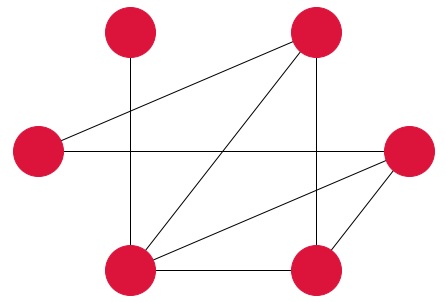

In [17]:
# Now that we have the pandas dataframes we can create a new network from it:
G_new = nx.from_pandas_adjacency(adjacency_dataframe)

# Check the new network (which should be the same as before/with the corresponding changes you made to ir before)
nx.draw_circular(G_new, with_labels = False,node_color='crimson',node_size=2500,font_color='white')

<br><div class="alert alert-block alert-success"> 
Now that you have seen how to transform our networkx graphs into pandas dataframes and back, convince yourself that you understand how to save (read) such dataframes into (from) files.
    <br>
    <br>
You will see more examples of this Input/Output behavior in other notebooks as the course progresses.    
</div>
    

In [29]:
G.add_edge('Fred','George')
G.add_edge('Ginny','George')
G.add_edge('Ron','Fred')


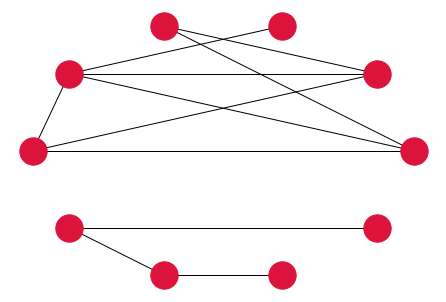

In [33]:
nx.draw_circular(G, with_labels = False,node_color='crimson',node_size=750,font_color='white')
